In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [18]:
# Save references to each table

station = base.classes.station
measurement = base.classes.measurement


In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
session.query(measurement.date).first()

('2010-01-01')

<AxesSubplot:>

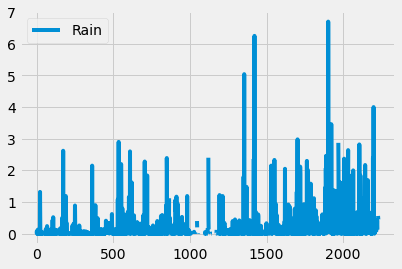

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last = session.query(func.max(measurement.date)).all()

# Calculate the date one year from the last date in data set.

rain_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= rain_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

rain_df = pd.DataFrame(data, columns=['Date', 'Rain'])

# Sort the dataframe by date

rain_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data

rain_df.plot()


In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Rain
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset

session.query(func.count(station.id)).all()

[(9)]

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = 'USC00519281'

session.query(func.min(measurement.prcp), func.max(measurement.prcp), func.avg(measurement.prcp)).filter(measurement.station == most_active).all()

[(0.0, 9.64, 0.2123520923520915)]

In [37]:
session.query(measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe55bfb2970>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0}

array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

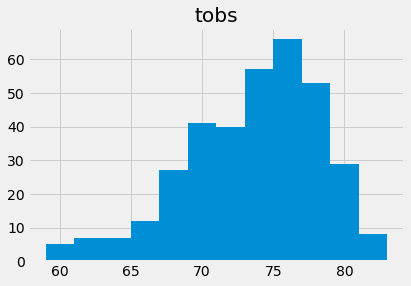

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_rain = session.query(measurement.tobs).filter(measurement.station == most_active).filter(measurement.date >= rain_date).all()
active_station_df = pd.DataFrame(active_rain, columns=['tobs'])
# active_station_df.plot()
active_station_df.hist(bins=12)


# Close session

In [63]:
# Close Session
session.close()